# Input/Output

In this section, we introduce how to input and output proxy data with `cfr`.

`cfr` provides a useful class called `ProxyDatabase` to conveniently store a collection of proxy records.
Each record is stored in the form of a class called `ProxyRecord`.
Here, we take the PAGES 2k global multiproxy database ([PAGES2k Consortium, 2017](https://doi.org/10.1038/sdata.2017.88)) as an example to illustrate the basic usage of these two classes regarding data input/output.

Essentially, there are below supported conversions:

- `pandas.DataFrame` <=> `ProxyDatabase`
- a netCDF file <=> `ProxyDatabase`
- a netCDF file <=> `ProxyRecord`

Required data to complete this tutorial:

- PAGES2k Phase 2 database: [pages2k_dataset.pkl](https://github.com/fzhu2e/cfr/raw/main/docsrc/notebooks/data/pages2k_dataset.pkl)

In [1]:
# import the packages we need for this tutorial
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

## `pandas.DataFrame` => `ProxyDatabase`
### Load the PAGES2k network stored in a `pandas.DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

### Create a `ProxyDatabase` and load from the `pandas.DataFrame`

(<Figure size 1000x1000 with 1 Axes>, {'map': <GeoAxesSubplot:>})

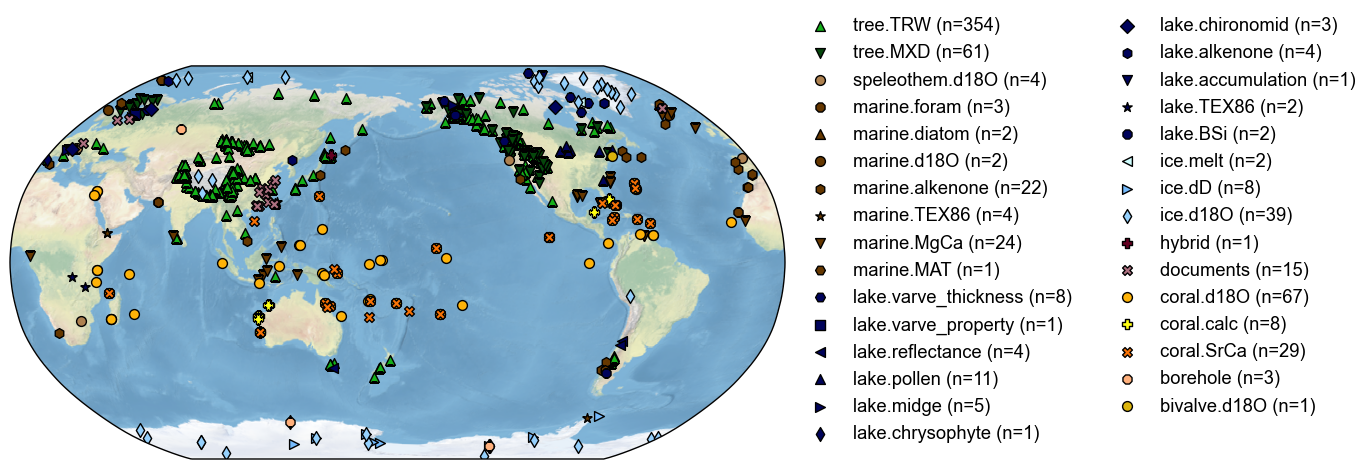

In [3]:
pdb = cfr.ProxyDatabase().from_df(df)
pdb.plot()  # plot to have a check

## `ProxyDatabase` => `pandas.DataFrame`

Any `ProxyDatabase` can be converted to a `pandas.DataFrame`.

In [4]:
df = pdb.to_df()
df.head()

,pid,lat,lon,ptype,time,value
0,NAm_153,52.7,241.7,tree.TRW,"[1563.0, 1564.0, 1565.0, 1566.0, 1567.0, 1568....","[0.883, 0.942, 1.043, 0.945, 1.141, 0.715, 0.6..."
1,Asi_245,23.0,114.0,documents,"[1500.0, 1510.0, 1520.0, 1530.0, 1540.0, 1550....","[0.157429639092533, -0.118646665464906, 0.3035..."
2,NAm_165,37.9,252.3,tree.MXD,"[1626.0, 1627.0, 1628.0, 1629.0, 1630.0, 1631....","[1.071, 1.014, 1.014, 0.966, 1.005, 1.072, 1.0..."
3,Asi_178,28.77,83.73,tree.TRW,"[1303.0, 1304.0, 1305.0, 1306.0, 1307.0, 1308....","[0.889, 0.788, 0.836, 0.741, 0.613, 0.732, 0.7..."
4,Asi_174,28.18,85.43,tree.TRW,"[1559.0, 1560.0, 1561.0, 1562.0, 1563.0, 1564....","[1.172, 1.21, 1.145, 1.307, 1.368, 1.37, 1.152..."


## `ProxyDatabase` => a netCDF file

Note that converting a `ProxyDatabase` to a netCDF file comes with the limitation that the time axis prior to 1 CE will be truncated since that is not supported yet.

In [5]:
pdb.to_nc('./data/PAGES2k.nc')

100%|██████████| 692/692 [00:18<00:00, 37.40it/s]


ProxyDatabase saved to: ./data/PAGES2k.nc


In [6]:
ds = xr.open_dataset('./data/PAGES2k.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 24096)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 2012-01-01 00:00:00
Data variables: (12/692)
    NAm_153  (time) float64 ...
    Asi_245  (time) float64 ...
    NAm_165  (time) float64 ...
    Asi_178  (time) float64 ...
    Asi_174  (time) float64 ...
    Eur_016  (time) float64 ...
    ...       ...
    Ocn_169  (time) float64 ...
    Asi_201  (time) float64 ...
    Asi_179  (time) float64 ...
    Arc_014  (time) float64 ...
    Ocn_071  (time) float64 ...
    Ocn_072  (time) float64 ...

## a netCDF file => `ProxyDatabase`

Now we load the generated netCDF file into a `ProxyDatabase`.

(<Figure size 1000x1000 with 1 Axes>, {'map': <GeoAxesSubplot:>})

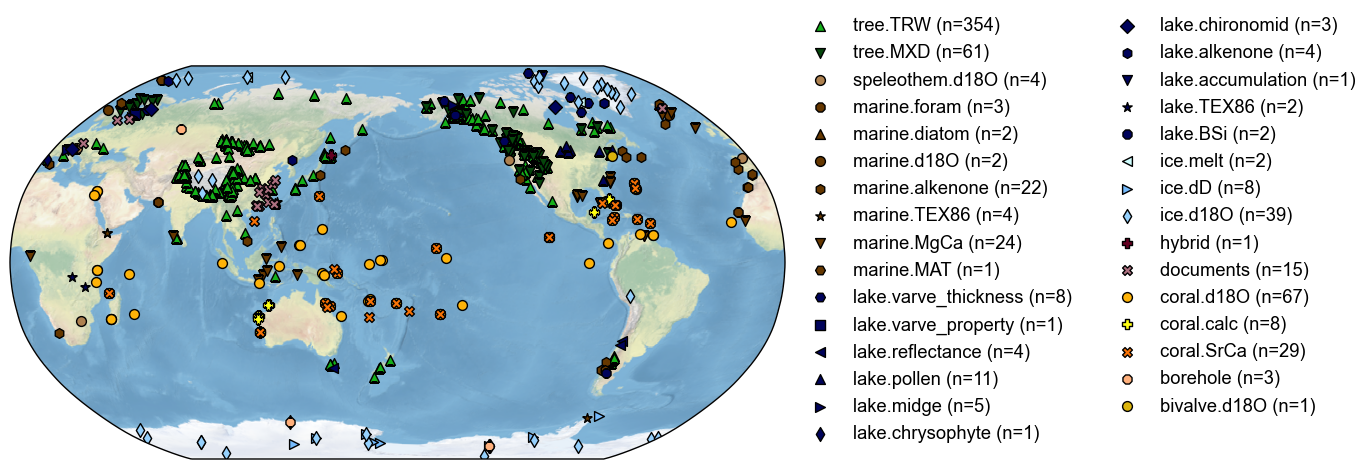

In [7]:
pdb = cfr.ProxyDatabase().load_nc('./data/PAGES2k.nc')
pdb.plot()  # plot to have a check

## `ProxyRecord` => a netCDF file

Each `ProxyRecord` can be saved to a netCDF file as well.

In [8]:
pdb.records['NAm_153'].to_nc('./data/NAm_153.nc')

ProxyRecord saved to: ./data/NAm_153.nc


## a netCDF file => `ProxyRecord`

Now we load the saved netCDF file to a `ProxyRecord`.

(<Figure size 1200x400 with 2 Axes>,
 {'ts': <AxesSubplot:title={'center':'NAm_153 (tree.TRW) @ (lat:52.70, lon:241.70)'}, xlabel='Time [yr]', ylabel='trsgi [NA]'>,
  'map': <GeoAxesSubplot:>})

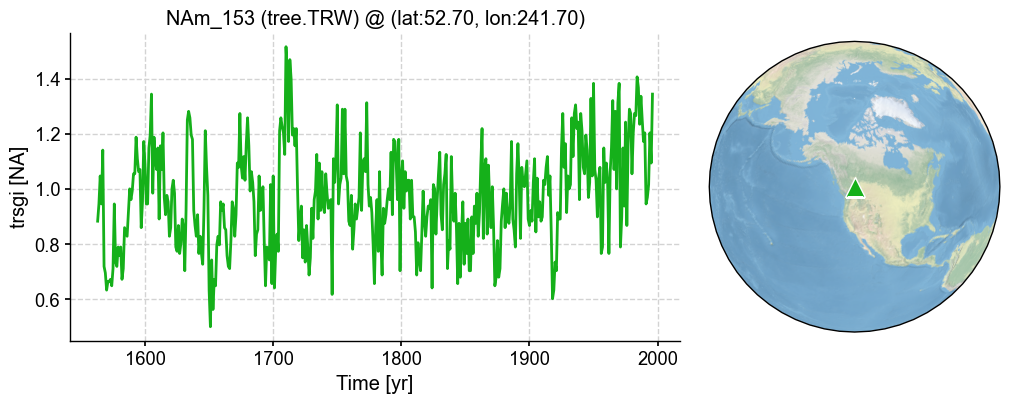

In [9]:
pobj = cfr.ProxyRecord().load_nc('./data/NAm_153.nc')
pobj.plot() # plot the record to have a check